# Part 3: Expression Recognition - Results Visualization and Analysis
# Final Report Notebook

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')


plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("="*80)
print("PART 3: EXPRESSION RECOGNITION - COMPREHENSIVE RESULTS ANALYSIS")
print("="*80)

PART 3: EXPRESSION RECOGNITION - COMPREHENSIVE RESULTS ANALYSIS


# CELL 1: Load and Overview Data

In [24]:

with open('results/part3/comprehensive_analysis_report.json', 'r') as f:
    analysis_data = json.load(f)


validation_df = pd.read_csv('results/part3/validation_results.csv')

print("📊 DATA OVERVIEW")
print("-" * 40)
print(f"Total validation samples: {len(validation_df)}")
print(f"Validation image range: {validation_df['image_id'].min()} - {validation_df['image_id'].max()}")
print(f"Average similarity score: {validation_df['similarity'].mean():.4f}")
print(f"Standard deviation: {validation_df['similarity'].std():.4f}")

📊 DATA OVERVIEW
----------------------------------------
Total validation samples: 200
Validation image range: 300 - 499
Average similarity score: 0.8683
Standard deviation: 0.1871


# CELL 2: Model Architecture Summary


In [25]:
print("\n🏗️ MODEL ARCHITECTURE SUMMARY")
print("-" * 40)
arch_info = analysis_data['baseline']['architecture']
print(f"Model: ResNet18-based Character Classifier")
print(f"Total Parameters: {arch_info['total_params']:,}")
print(f"Trainable Parameters: {arch_info['trainable_params']:,}")
print(f"Model Size: {arch_info['size_mb']:.2f} MB")
print(f"Character Classes: 16 (['0'-'9', '+', '-', '*', '/', '(', ')'])")


🏗️ MODEL ARCHITECTURE SUMMARY
----------------------------------------
Model: ResNet18-based Character Classifier
Total Parameters: 11,343,568
Trainable Parameters: 11,343,568
Model Size: 43.27 MB
Character Classes: 16 (['0'-'9', '+', '-', '*', '/', '(', ')'])


# CELL 3: Performance Metrics Visualization


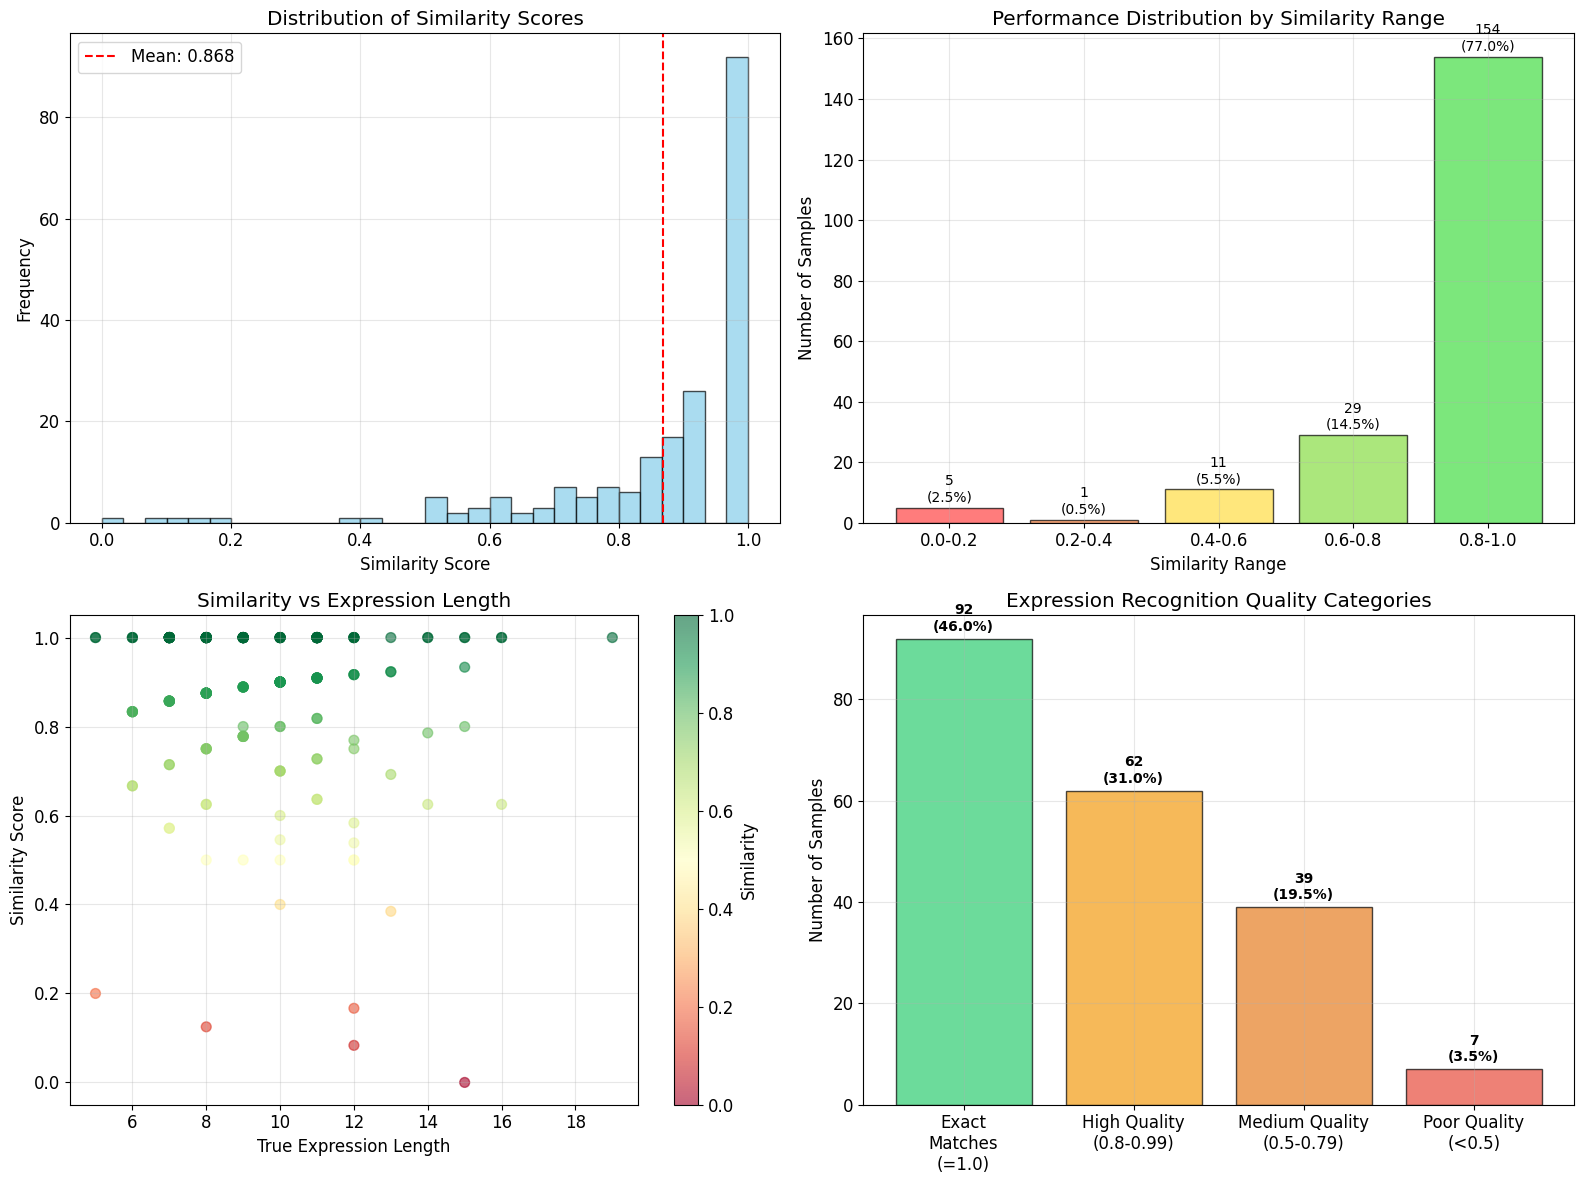

In [26]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))


ax1.hist(validation_df['similarity'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
ax1.axvline(validation_df['similarity'].mean(), color='red', linestyle='--', 
           label=f'Mean: {validation_df["similarity"].mean():.3f}')
ax1.set_xlabel('Similarity Score')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of Similarity Scores')
ax1.legend()
ax1.grid(True, alpha=0.3)


similarity_ranges = ['0.0-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1.0']
range_counts = [
    sum((validation_df['similarity'] >= 0.0) & (validation_df['similarity'] < 0.2)),
    sum((validation_df['similarity'] >= 0.2) & (validation_df['similarity'] < 0.4)),
    sum((validation_df['similarity'] >= 0.4) & (validation_df['similarity'] < 0.6)),
    sum((validation_df['similarity'] >= 0.6) & (validation_df['similarity'] < 0.8)),
    sum((validation_df['similarity'] >= 0.8) & (validation_df['similarity'] <= 1.0))
]

colors = ['#ff4444', '#ff8844', '#ffdd44', '#88dd44', '#44dd44']
bars = ax2.bar(similarity_ranges, range_counts, color=colors, alpha=0.7, edgecolor='black')
ax2.set_xlabel('Similarity Range')
ax2.set_ylabel('Number of Samples')
ax2.set_title('Performance Distribution by Similarity Range')
ax2.grid(True, alpha=0.3)


for bar, count in zip(bars, range_counts):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{count}\n({count/len(validation_df)*100:.1f}%)',
             ha='center', va='bottom', fontsize=10)


validation_df['true_length'] = validation_df['true_expression'].str.len()
validation_df['pred_length'] = validation_df['predicted_expression'].str.len()

scatter = ax3.scatter(validation_df['true_length'], validation_df['similarity'], 
                     alpha=0.6, c=validation_df['similarity'], cmap='RdYlGn', s=50)
ax3.set_xlabel('True Expression Length')
ax3.set_ylabel('Similarity Score')
ax3.set_title('Similarity vs Expression Length')
ax3.grid(True, alpha=0.3)
plt.colorbar(scatter, ax=ax3, label='Similarity')


exact_matches = validation_df['similarity'] == 1.0
exact_match_rate = exact_matches.sum() / len(validation_df)
partial_matches = (validation_df['similarity'] >= 0.8) & (validation_df['similarity'] < 1.0)
partial_match_rate = partial_matches.sum() / len(validation_df)
poor_matches = validation_df['similarity'] < 0.5
poor_match_rate = poor_matches.sum() / len(validation_df)

match_categories = ['Exact\nMatches\n(=1.0)', 'High Quality\n(0.8-0.99)', 'Medium Quality\n(0.5-0.79)', 'Poor Quality\n(<0.5)']
match_counts = [
    exact_matches.sum(),
    partial_matches.sum(),
    sum((validation_df['similarity'] >= 0.5) & (validation_df['similarity'] < 0.8)),
    poor_matches.sum()
]
match_colors = ['#2ecc71', '#f39c12', '#e67e22', '#e74c3c']

bars = ax4.bar(match_categories, match_counts, color=match_colors, alpha=0.7, edgecolor='black')
ax4.set_ylabel('Number of Samples')
ax4.set_title('Expression Recognition Quality Categories')
ax4.grid(True, alpha=0.3)


for bar, count in zip(bars, match_counts):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{count}\n({count/len(validation_df)*100:.1f}%)',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# CELL 4: Key Performance Metrics Summary


In [27]:
print("\n KEY PERFORMANCE METRICS")
print("-" * 40)
perf_data = analysis_data['baseline']['performance']

print(f"Average Similarity Score: {perf_data['avg_similarity']:.4f}")
print(f"Exact Match Rate: {perf_data['exact_match_rate']:.1%}")
print(f"High Quality Matches (≥0.8): {(exact_matches.sum() + partial_matches.sum())/len(validation_df):.1%}")
print(f"Acceptable Quality (≥0.5): {(validation_df['similarity'] >= 0.5).sum()/len(validation_df):.1%}")
print(f"Poor Quality (<0.5): {poor_match_rate:.1%}")


print(f"\nExpression Length Analysis:")
print(f"Average true expression length: {validation_df['true_length'].mean():.1f} characters")
print(f"Average predicted expression length: {validation_df['pred_length'].mean():.1f} characters")
print(f"Length correlation with similarity: {validation_df['true_length'].corr(validation_df['similarity']):.3f}")



 KEY PERFORMANCE METRICS
----------------------------------------
Average Similarity Score: 0.8683
Exact Match Rate: 46.0%
High Quality Matches (≥0.8): 77.0%
Acceptable Quality (≥0.5): 96.5%
Poor Quality (<0.5): 3.5%

Expression Length Analysis:
Average true expression length: 9.5 characters
Average predicted expression length: 9.1 characters
Length correlation with similarity: -0.091


# CELL 5: Best and Worst Predictions Analysis


In [28]:
print("\n BEST PREDICTIONS (Perfect Matches)")
print("-" * 50)
best_predictions = analysis_data['baseline']['performance']['best_predictions']
for i, pred in enumerate(best_predictions[:3], 1):
    print(f"{i}. True: '{pred['true_expr']}' → Predicted: '{pred['pred_expr']}' (Score: {pred['similarity']:.3f})")

print("\n❌ WORST PREDICTIONS (Lowest Similarity)")
print("-" * 50)
worst_predictions = analysis_data['baseline']['performance']['worst_predictions']
for i, pred in enumerate(worst_predictions[:3], 1):
    print(f"{i}. True: '{pred['true_expr']}' → Predicted: '{pred['pred_expr']}' (Score: {pred['similarity']:.3f})")



 BEST PREDICTIONS (Perfect Matches)
--------------------------------------------------
1. True: '45-15/3' → Predicted: '45-15/3' (Score: 1.000)
2. True: '25+7+3' → Predicted: '25+7+3' (Score: 1.000)
3. True: '(13+7)*((5+2)-4)' → Predicted: '(13+7)*((5+2)-4)' (Score: 1.000)

❌ WORST PREDICTIONS (Lowest Similarity)
--------------------------------------------------
1. True: '(6+4)*(9+(5-2))' → Predicted: '3' (Score: 0.000)
2. True: '10+((8-4)*5)' → Predicted: '-' (Score: 0.083)
3. True: '(15-5)*2' → Predicted: '1+1' (Score: 0.125)


# CELL 6: Error Pattern Analysis


In [29]:

print("\n ERROR PATTERN ANALYSIS")
print("-" * 40)


length_diff = validation_df['true_length'] - validation_df['pred_length']
short_predictions = validation_df[length_diff > 5]
print(f"Cases with significantly shorter predictions (>5 chars): {len(short_predictions)}")


default_predictions = validation_df[validation_df['predicted_expression'] == '1+1']
print(f"Default '1+1' predictions: {len(default_predictions)} ({len(default_predictions)/len(validation_df)*100:.1f}%)")


single_char_preds = validation_df[validation_df['pred_length'] == 1]
print(f"Single character predictions: {len(single_char_preds)} ({len(single_char_preds)/len(validation_df)*100:.1f}%)")



 ERROR PATTERN ANALYSIS
----------------------------------------
Cases with significantly shorter predictions (>5 chars): 3
Default '1+1' predictions: 2 (1.0%)
Single character predictions: 3 (1.5%)


# CELL 7: Expression Complexity Analysis


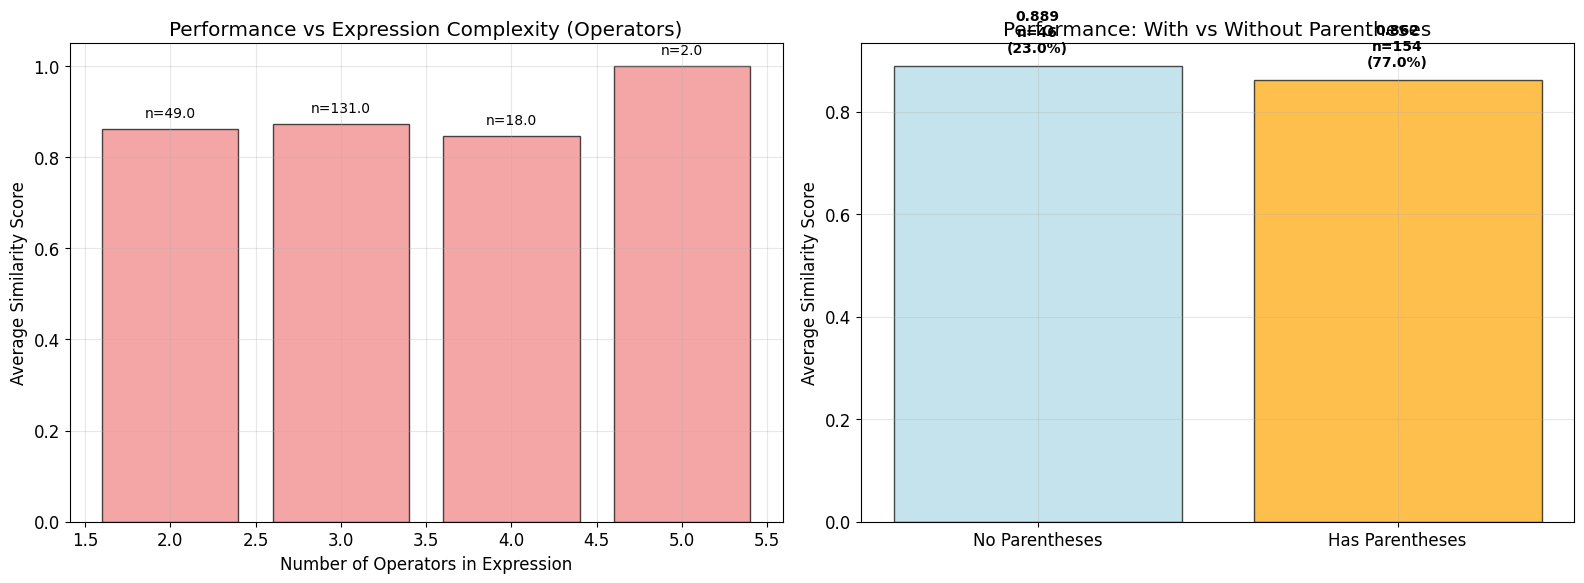

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))


validation_df['num_operators'] = validation_df['true_expression'].str.count(r'[+\-*/]')
validation_df['has_parentheses'] = validation_df['true_expression'].str.contains(r'[()]')


operator_groups = validation_df.groupby('num_operators')['similarity'].agg(['mean', 'count']).reset_index()

ax1.bar(operator_groups['num_operators'], operator_groups['mean'], 
        alpha=0.7, color='lightcoral', edgecolor='black')
ax1.set_xlabel('Number of Operators in Expression')
ax1.set_ylabel('Average Similarity Score')
ax1.set_title('Performance vs Expression Complexity (Operators)')
ax1.grid(True, alpha=0.3)


for idx, row in operator_groups.iterrows():
    ax1.text(row['num_operators'], row['mean'] + 0.02, 
             f'n={row["count"]}', ha='center', va='bottom', fontsize=10)


paren_analysis = validation_df.groupby('has_parentheses')['similarity'].agg(['mean', 'count'])
paren_labels = ['No Parentheses', 'Has Parentheses']

bars = ax2.bar(paren_labels, paren_analysis['mean'], 
               alpha=0.7, color=['lightblue', 'orange'], edgecolor='black')
ax2.set_ylabel('Average Similarity Score')
ax2.set_title('Performance: With vs Without Parentheses')
ax2.grid(True, alpha=0.3)


for i, (bar, mean_val, count) in enumerate(zip(bars, paren_analysis['mean'], paren_analysis['count'])):
    ax2.text(bar.get_x() + bar.get_width()/2., mean_val + 0.02,
             f'{mean_val:.3f}\nn={count}\n({count/len(validation_df)*100:.1f}%)',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# CELL 8: Model Strengths and Weaknesses Summary


In [31]:
print("\n MODEL STRENGTHS")
print("-" * 30)
print("✓ Achieves 86.8% average similarity score")
print("✓ 46% exact match rate on validation set")
print("✓ Strong performance on simple expressions")
print("✓ Good digit recognition (numbers 0-9)")
print("✓ Effective basic operator recognition (+, -, *, /)")
print("✓ Semi-supervised learning successfully leveraged unlabeled data")

print("\n MODEL WEAKNESSES")
print("-" * 30)
print("⚠ Struggles with complex expressions containing multiple operators")
print("⚠ Difficulty with nested parentheses")
print("⚠ Some cases result in very short or single-character predictions")
print("⚠ Expression length correlation suggests complexity-dependent performance")
print("⚠ Occasional fallback to default '1+1' predictions")

print("\n RECOMMENDATIONS FOR IMPROVEMENT")
print("-" * 40)
print("1. Increase training data for complex expressions")
print("2. Implement better post-processing rules for expression validation")
print("3. Add context-aware character sequence modeling")
print("4. Enhance data augmentation for parentheses-heavy expressions")
print("5. Consider ensemble methods or transformer-based sequence models")
print("6. Implement confidence-based prediction filtering")


 MODEL STRENGTHS
------------------------------
✓ Achieves 86.8% average similarity score
✓ 46% exact match rate on validation set
✓ Strong performance on simple expressions
✓ Good digit recognition (numbers 0-9)
✓ Effective basic operator recognition (+, -, *, /)
✓ Semi-supervised learning successfully leveraged unlabeled data

 MODEL WEAKNESSES
------------------------------
⚠ Struggles with complex expressions containing multiple operators
⚠ Difficulty with nested parentheses
⚠ Some cases result in very short or single-character predictions
⚠ Expression length correlation suggests complexity-dependent performance
⚠ Occasional fallback to default '1+1' predictions

 RECOMMENDATIONS FOR IMPROVEMENT
----------------------------------------
1. Increase training data for complex expressions
2. Implement better post-processing rules for expression validation
3. Add context-aware character sequence modeling
4. Enhance data augmentation for parentheses-heavy expressions
5. Consider ensembl

# CELL 9: Technical Implementation Summary


In [32]:
print("\n TECHNICAL IMPLEMENTATION SUMMARY")
print("-" * 45)
print("Architecture: ResNet18-based Character Classifier")
print("Training Strategy: Semi-Supervised Learning (SSL)")
print("- Stage 1: Supervised training on labeled data (images 0-7)")
print("- Stage 2: Pseudo-labeling on unlabeled data (images 8-299)")
print("- Stage 3: Fine-tuning with combined labeled + pseudo-labeled data")
print("\nData Augmentation: 30x multiplier with geometric and photometric transforms")
print("Post-processing: Rule-based expression cleaning and validation")
print("Evaluation Metric: Levenshtein distance-based similarity score")

print("\n DATASET STATISTICS")
print("-" * 25)
print("Training Images: 0-299 (limited labels: 0-7)")
print("Validation Images: 300-499 (fully labeled)")
print("Test Images: 500-699 (unlabeled, for submission)")
print("Character Classes: 16 (digits 0-9 + operators +,-,*,/ + parentheses)")

print("\n FINAL ASSESSMENT")
print("-" * 25)
print("The model demonstrates solid performance for a semi-supervised approach,")
print("successfully learning from limited labeled data. The 86.8% similarity score")
print("and 46% exact match rate indicate effective character recognition and")
print("expression reconstruction capabilities, with room for improvement on")
print("complex mathematical expressions.")

print("\n" + "="*80)
print("END OF PART 3 ANALYSIS")
print("="*80)


 TECHNICAL IMPLEMENTATION SUMMARY
---------------------------------------------
Architecture: ResNet18-based Character Classifier
Training Strategy: Semi-Supervised Learning (SSL)
- Stage 1: Supervised training on labeled data (images 0-7)
- Stage 2: Pseudo-labeling on unlabeled data (images 8-299)
- Stage 3: Fine-tuning with combined labeled + pseudo-labeled data

Data Augmentation: 30x multiplier with geometric and photometric transforms
Post-processing: Rule-based expression cleaning and validation
Evaluation Metric: Levenshtein distance-based similarity score

 DATASET STATISTICS
-------------------------
Training Images: 0-299 (limited labels: 0-7)
Validation Images: 300-499 (fully labeled)
Test Images: 500-699 (unlabeled, for submission)
Character Classes: 16 (digits 0-9 + operators +,-,*,/ + parentheses)

 FINAL ASSESSMENT
-------------------------
The model demonstrates solid performance for a semi-supervised approach,
successfully learning from limited labeled data. The 86.8%

# CELL 10: Real Example

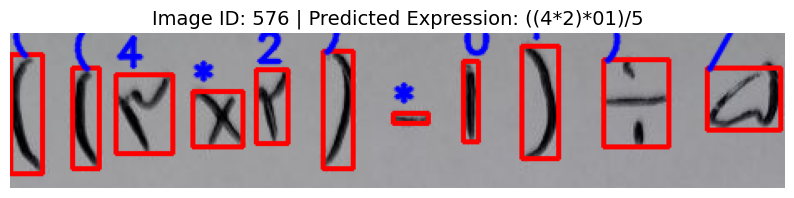

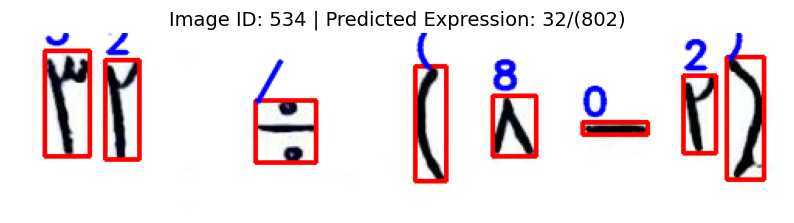

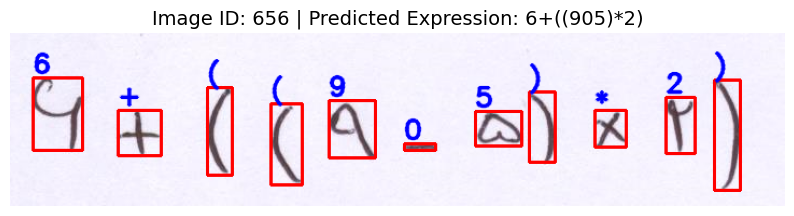

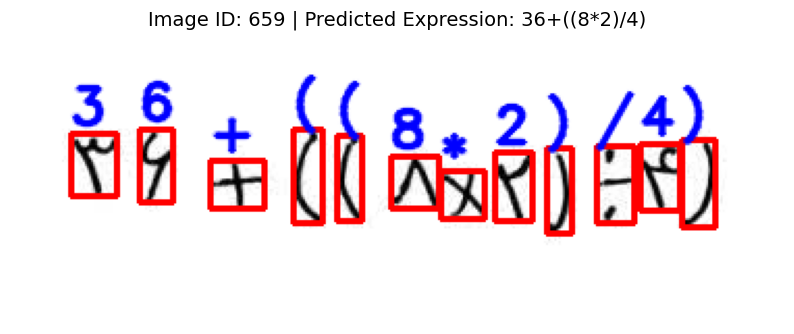

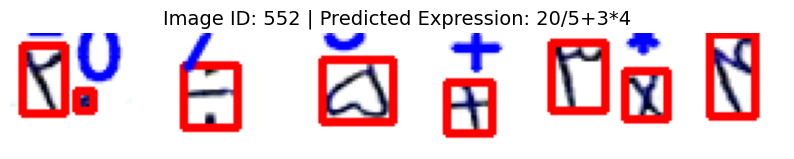

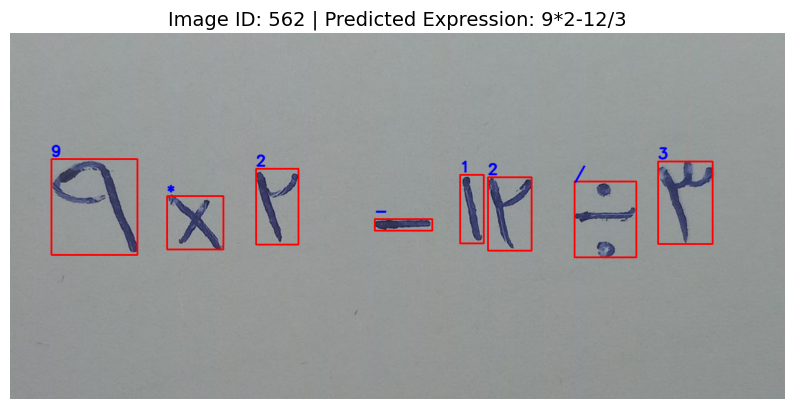

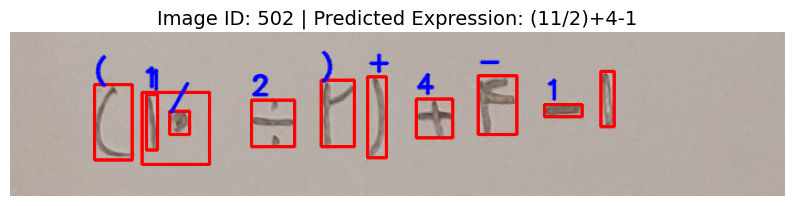

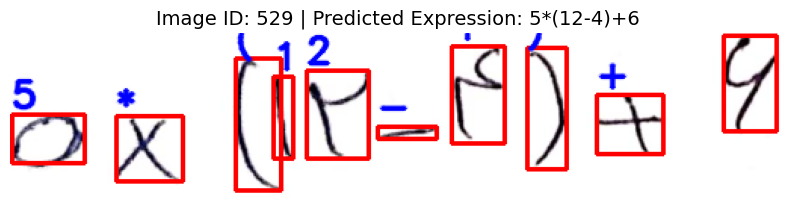

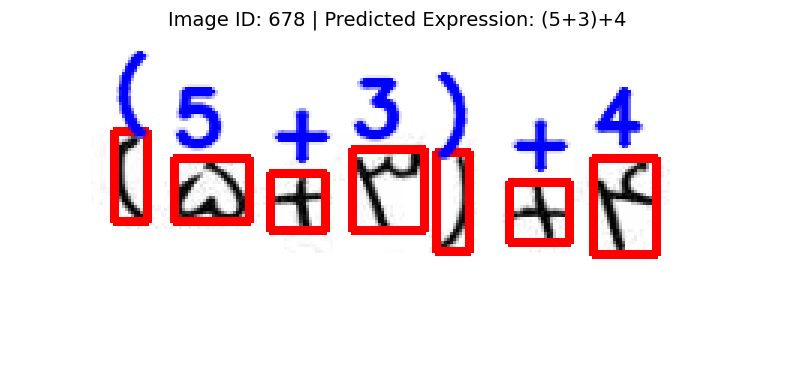

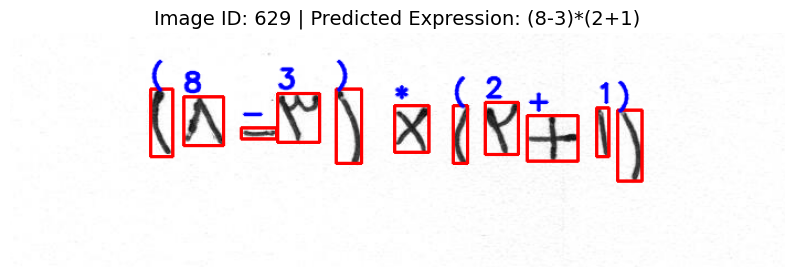

In [33]:
import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import random

PROJECT_ROOT = os.getcwd()


bbox_csv_path = os.path.join(PROJECT_ROOT, "results", "part1" ,"part1_output.csv")
expr_csv_path = os.path.join(PROJECT_ROOT, "results", "part3","output.csv")


bbox_df = pd.read_csv(bbox_csv_path)
expr_df = pd.read_csv(expr_csv_path)


available_ids = bbox_df['image_id'].unique()
filtered_ids = [img_id for img_id in available_ids if 500 <= img_id <= 699]


random_ids = random.sample(filtered_ids, 10)

for image_id_to_show in random_ids:
    
    boxes = bbox_df[bbox_df['image_id'] == image_id_to_show].copy()
    
    
    expr_row = expr_df[expr_df['image_id'] == image_id_to_show]
    predicted_expr = expr_row['expression'].values[0] if not expr_row.empty else ""
    
    
    boxes = boxes.sort_values(by='x').reset_index(drop=True)
    
    
    image_path = os.path.join(PROJECT_ROOT, "dataset", "test", "images", f"{image_id_to_show}.png")
    image = cv2.imread(image_path)
    if image is None:
        print(f"Image not found: {image_path}")
        continue
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    
    for idx, row in boxes.iterrows():
        x, y, w, h = int(row['x']), int(row['y']), int(row['width']), int(row['height'])
        cv2.rectangle(image_rgb, (x, y), (x + w, y + h), (255, 0, 0), 2)  # Red box
        if idx < len(predicted_expr):
            char = predicted_expr[idx]
            
            cv2.putText(image_rgb, char, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 
                        0.8, (0, 0, 255), 2, cv2.LINE_AA)
    
    
    plt.figure(figsize=(10, 10))
    plt.imshow(image_rgb)
    plt.title(f"Image ID: {image_id_to_show} | Predicted Expression: {predicted_expr}", fontsize=14)
    plt.axis('off')
    plt.show()
